<a href="https://colab.research.google.com/github/USIS019720/Programacion_III-Pyton/blob/IA-Ropa/Ropa_IA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Importar librerias
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import math
import tensorflow_datasets as tfds

In [ ]:
#cargamos nuestro dataset en variables
dataset, metadata = tfds.load('fashion_mnist', as_supervised=True, with_info=True)
datos_entrenamiento, datos_prueba = dataset["train"], dataset["test"]
print(datos_entrenamiento)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/fashion_mnist/3.0.1.incompleteFLXFNM/fashion_mnist-train.tfrecord


  0%|          | 0/60000 [00:00<?, ? examples/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/fashion_mnist/3.0.1.incompleteFLXFNM/fashion_mnist-test.tfrecord


  0%|          | 0/10000 [00:00<?, ? examples/s]

Dataset fashion_mnist downloaded and prepared to /root/tensorflow_datasets/fashion_mnist/3.0.1. Subsequent calls will reuse this data.
<PrefetchDataset shapes: ((28, 28, 1), ()), types: (tf.uint8, tf.int64)>


In [ ]:
numeros_letras = ["bolso", "saco", "vestido", "sueter", "sandalia", "camisa", "zapatos", "pantalon", "botines", "camiseta"
]

In [ ]:
#pasar en variables los datos de entrenamiento y prueba
numeros_ejemplo_entrenamiento = metadata.splits["train"].num_examples
numeros_ejemplo_prueba = metadata.splits["test"].num_examples
print(numeros_ejemplo_entrenamiento, numeros_ejemplo_prueba)

60000 10000


In [ ]:
#funcion normalizadora de los pixeles de 0 - 255 que sean de 0 - 1
def normalizacion(images, labels):
  images = tf.cast(images, tf.float32)
  images /= 255 # 150/255=0.588
  return images, labels

In [ ]:
#llamamoas la funcion normalizadora en ambos dataset
datos_entrenamiento = datos_entrenamiento.map(normalizacion)
datos_prueba = datos_prueba.map(normalizacion)

In [ ]:
#estruturamos nuestra red neuronal
modelo = tf.keras.Sequential([
        tf.keras.layers.Flatten(input_shape=(28,28,1)), #capa de entreda de 28*28 = 784 neuronas una para cada pixel
        tf.keras.layers.Dense(64, activation=tf.nn.relu), #capa oculta con 64 neuronas, funcion de activacion relu
        tf.keras.layers.Dense(64, activation=tf.nn.relu), #capa oculta con 64 neuronas, funcion de activacion relu
        tf.keras.layers.Dense(10, activation=tf.nn.softmax) #capa de salida con 10 neuronas una para cada numero, 
        #funcion de activacion softmax. esta funcion es requerida para clasificacion
])

In [ ]:
#Compilamos el modelo de red neuronal e indicamos las funciones a utilizar 
modelo.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=['accuracy']
)

In [ ]:
#Entrenamiento por lotes
batchsize = 32
datos_entrenamiento = datos_entrenamiento.repeat().shuffle(numeros_ejemplo_entrenamiento).batch(batchsize)
datos_prueba = datos_prueba.repeat().shuffle(numeros_ejemplo_prueba).batch(batchsize)

In [ ]:
#entrenado nuetro modelo de datos
modelo.fit(datos_entrenamiento, epochs=10, 
           steps_per_epoch=math.ceil(numeros_ejemplo_entrenamiento/batchsize))

Epoch 1/10
1875/1875 [==============================] - 8s 3ms/step - loss: 0.2438 - accuracy: 0.9082
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2380 - accuracy: 0.9104
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2301 - accuracy: 0.9144
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2209 - accuracy: 0.9162
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2184 - accuracy: 0.9168
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2091 - accuracy: 0.9201
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2097 - accuracy: 0.9199
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2000 - accuracy: 0.9241
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2008 - accuracy: 0.9247
Epoch 10/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.195

In [ ]:
#evaluar el modelo con los datos de prueba
test_loss, test_accuracy = modelo.evaluate(datos_prueba, steps=math.ceil(numeros_ejemplo_prueba/batchsize))
print("Resultado de las pruebas", test_loss, test_accuracy)

313/313 [==============================] - 1s 3ms/step - loss: 0.3391 - accuracy: 0.8898
Resultado de las pruebas 0.33912473917007446 0.889776349067688


In [ ]:
#graficar la salida para evaluar los resultados
def graficar_imagen(i, predictions_array, true_labels, images):
  predictions_array, true_labels, img = predictions_array[i], true_labels[i], images[i]
  plt.grid(False)
  #plt.xticks([])
  #plt.yticks([])
  plt.imshow(img[...,0], cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label==true_labels:
    color = "green"
  else:
    color = "red"
  plt.xlabel("Prediccion: {}".format(numeros_letras[predicted_label]), color=color)

In [ ]:
#convertimos los tensores o imagenes en matrices numpy
for imagen_prueba, etiqueta_prueba in datos_prueba.take(1):
  imagen_prueba = imagen_prueba.numpy()
  etiqueta_prueba = etiqueta_prueba.numpy()
  predicciones = modelo.predict(imagen_prueba)

In [ ]:
#Graficamos los valores de las matriz una para las imagenes y otra para las graficas de barra segun el acierto
def graficar_valores_matriz(i, matriz_prediccion, etiqueta_verdadera):
  matriz_prediccion, etiqueta_verdadera = matriz_prediccion[i], etiqueta_verdadera[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), matriz_prediccion, color="#888888")
  plt.ylim([0,1])
  etiqueta_prediccion = np.argmax(matriz_prediccion)

  thisplot[etiqueta_prediccion].set_color("red")
  thisplot[etiqueta_verdadera].set_color("green")

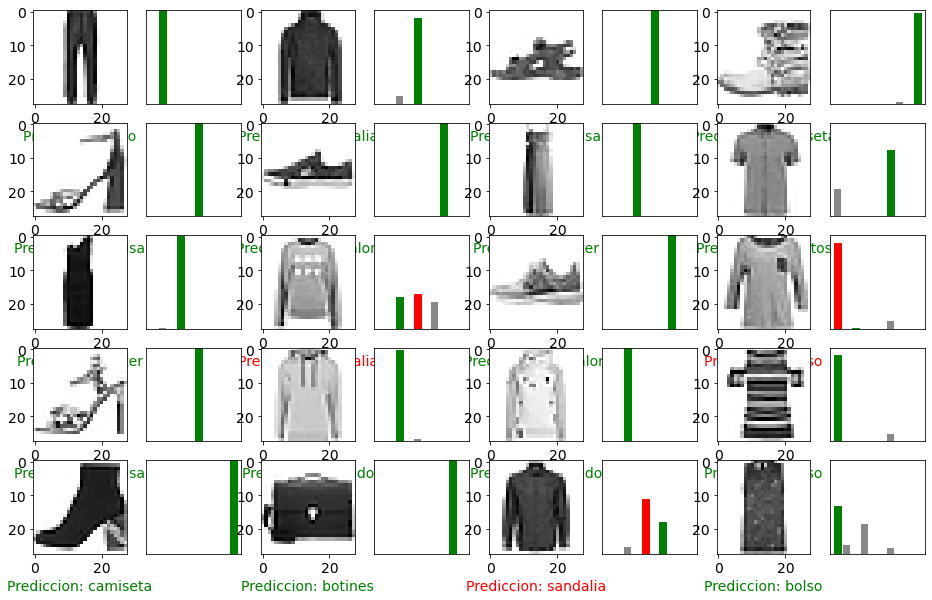

In [ ]:
#recorrer las imagenes a graficar
numfilas = 5
numcols = 4
numimgs = numfilas*numcols

plt.figure(figsize=(2*2*numcols, 2*numfilas))
for i in range(numimgs):
  plt.subplot(numfilas, 2*numcols, 2*i+1)
  graficar_imagen(i, predicciones, etiqueta_prueba, imagen_prueba)

  plt.subplot(numfilas, 2*numcols, 2*i+2)
  graficar_valores_matriz(i, predicciones, etiqueta_prueba)

plt.rcParams['font.size'] = 12
plt.show()

In [ ]:
import cv2
imgLocal = cv2.imread('/content/zapatos.jpg', 0)
imgLocal = tf.cast(imgLocal, tf.float32)
imgLocal = imgLocal / 255
imgLocal = np.expand_dims(imgLocal, axis=0)

print(imgLocal.shape)

(1, 28, 28)


In [ ]:
prdLocal = modelo.predict(imgLocal, batch_size=1)
tagLocalTest = np.argmax(prdLocal)
print(prdLocal)

[[1.68342409e-15 4.71820703e-35 6.41087997e-21 1.09820674e-16
  2.73370922e-14 0.00000000e+00 2.16735134e-06 0.00000000e+00
  9.99997854e-01 3.83532515e-17]]


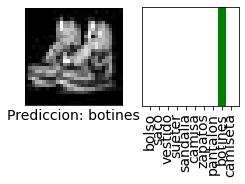

In [ ]:
columns = 2
rows = 2

plt.figure(figsize=(2*2*columns, 2*rows))
plt.subplot(rows, 2*columns, 2*0+1)
plt.grid(False)
plt.xticks([])
plt.yticks([])
plt.imshow(imgLocal[0,...], cmap=plt.cm.binary)
# plt.colorbar()
plt.xlabel("Prediccion: {}".format(numeros_letras[tagLocalTest]), color='black')

plt.subplot(rows, 2*columns, 2*0+2)
plt.grid(False)
plt.xticks([])
plt.yticks([])
thisplot = plt.bar(range(10), prdLocal[0], color='#777777')
plt.ylim([0,1])
thisplot[tagLocalTest].set_color("red")
thisplot[tagLocalTest].set_color("green")
# plt.legend(prdFinal, title='Predicción', bbox_to_anchor=(1, 0, 0.5, 1), loc="center left")
plt.xticks(range(10), numeros_letras, rotation=90)

plt.rcParams['font.size'] = 14
plt.show()